<a href="https://colab.research.google.com/github/sanae-a11y/AI/blob/main/pca_dataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librairies

In [ ]:
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 408.6 MB 28 kB/s 
     |████████████████████████████████| 1.1 MB 47.6 MB/s 
     |████████████████████████████████| 8.8 MB 48.8 MB/s 
     |████████████████████████████████| 3.1 MB 34.5 MB/s 
     |████████████████████████████████| 344 kB 46.5 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 423 kB 48.7 MB/s 
     |████████████████████████████████| 9.7 MB 42.5 MB/s 
     |████████████████████████████████| 1.6 MB 64.6 MB/s 
     |████████████████████████████████| 1.2 MB 57.9 MB/s 
     |████████████████████████████████| 271 kB 45.1 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 59 kB 7.2 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 133 kB 54.5 MB/s 
     |████████████████████████████████|

In [ ]:
!pip install trimesh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 659 kB 7.0 MB/s 


In [ ]:
#numpy est une bibliothèque destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
import numpy as np
#open3d est une bibliothèque open-source qui prend en charge le développement rapide de logiciels traitant des données 3D.
import open3d as o3d
from numpy.linalg import eig
import trimesh
#glob est utilisé pour renvoyer tous les chemins d’accès de fichier qui correspondent à un modèle spécifique.
import glob
#le module os en python fournit des fonctions de récupération du contenu des dossiers
import os
from sklearn.decomposition import PCA 
import pandas as pd
#ce module est pour la normalisation des données
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#Seaborn est une bibliothèque de visualisation de données Python basée sur matplotlib. Il fournit une interface de haut niveau pour dessiner des graphiques statistiques attrayants et informatifs
import plotly.graph_objects as go

#Importation des données

In [ ]:
#l'emplacement de dossier 
DATA_DIR = tf.keras.utils.get_file(
    "modelnet.zip",
    "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True,
)
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")

473415680/473402300 [==============================] - 13s 0us/step


In [ ]:
#fonction qui permet d'exporter tout les  fichiers .off 
def parse_dataset(num_points=2048):

    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    class_map = {}
    folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))

    for i, folder in enumerate(folders):
        print("processing class: {}".format(os.path.basename(folder)))
        # store folder name with ID so we can retrieve later
        class_map[i] = folder.split("/")[-1]
        # gather all files
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))

        for f in train_files:
            train_points.append(trimesh.load(f).sample(num_points))
            train_labels.append(i)

        for f in test_files:
            test_points.append(trimesh.load(f).sample(num_points))
            test_labels.append(i)

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),
        class_map,
    )

In [ ]:
NUM_POINTS = 2048

train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(
    NUM_POINTS
)

processing class: table
processing class: sofa
processing class: toilet
processing class: bed
processing class: night_stand
processing class: dresser
processing class: chair
processing class: bathtub
processing class: monitor
processing class: desk


In [ ]:
train_labels

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
train_points.shape

(3991, 2048, 3)

#Visualisation des données

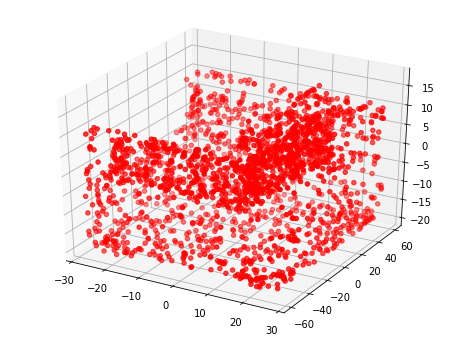

In [ ]:
X = train_points[450,:,:]
points = X
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2],color='red')
#ax.set_axis_off()
plt.show()

In [ ]:
test_points.shape

(908, 2048, 3)

#Augmentation des Objets 3D en utilisant TreeGAN 

In [ ]:
data_augm = pd.read_csv("GeneratedData.csv")

In [ ]:
data_augm.head(3)

,"tf.Tensor([0.5563456 0.8949018 0.18599592], shape=(3,), dtype=float32)","tf.Tensor([0.7852778 0.46786582 0.12779859], shape=(3,), dtype=float32)","tf.Tensor([0.89623517 0.62859935 0.32656297], shape=(3,), dtype=float32)","tf.Tensor([0.89338434 0.3325213 0.26159486], shape=(3,), dtype=float32)","tf.Tensor([0.29529798 0.8566884 0.13125502], shape=(3,), dtype=float32)","tf.Tensor([0.9355408 0.35700616 0.59186864], shape=(3,), dtype=float32)","tf.Tensor([0.15988892 0.3376804 0.13898095], shape=(3,), dtype=float32)","tf.Tensor([0.42331976 0.8362013 0.09545535], shape=(3,), dtype=float32)","tf.Tensor([0.5984976 0.43142486 0.08041383], shape=(3,), dtype=float32)","tf.Tensor([0.98524183 0.548965 0.9436939 ], shape=(3,), dtype=float32)",...,"tf.Tensor([0.39364788 0.6590009 0.01286678], shape=(3,), dtype=float32)","tf.Tensor([0.7904815 0.16985606 0.49065304], shape=(3,), dtype=float32)","tf.Tensor([0.8013871 0.5949237 0.07140706], shape=(3,), dtype=float32)","tf.Tensor([0.5715916 0.9543828 0.4335432], shape=(3,), dtype=float32)","tf.Tensor([0.64062274 0.9563905 0.35279548], shape=(3,), dtype=float32)","tf.Tensor([0.9634932 0.5356629 0.8972145], shape=(3,), dtype=float32)","tf.Tensor([0.8321675 0.21356271 0.4886032 ], shape=(3,), dtype=float32)","tf.Tensor([0.52562827 0.54256296 0.08041383], shape=(3,), dtype=float32)","tf.Tensor([0.94132406 0.47131988 0.48491147], shape=(3,), dtype=float32)","tf.Tensor([0.04824329 0.63631916 0.3340589 ], shape=(3,), dtype=float32)"
0,"tf.Tensor([0.8529131 1. 0.06885227], ...","tf.Tensor([1. 0.4138663 0.631998 ], sha...","tf.Tensor([0. 0.9500383 0.7624541], sha...","tf.Tensor([0.7216631 1. 0.24348076], ...","tf.Tensor([0.81742644 0.93775177 0.09801384], ...","tf.Tensor([0.90450835 0.16852424 0.7841089 ], ...","tf.Tensor([0.11426394 0.27501985 0.7422956 ], ...","tf.Tensor([0.67663044 1. 0.5035405 ], ...","tf.Tensor([1. 0.26502377 0.04820774], ...","tf.Tensor([0.18685696 0.85597086 0.09801384], ...",...,"tf.Tensor([0.11426394 0.7333729 0.18702354], ...","tf.Tensor([0.00597213 0. 0.45015797], ...","tf.Tensor([0.9945841 0.65356576 0.7841089 ], ...","tf.Tensor([0.07607234 0.82076955 0. ], ...","tf.Tensor([0.93999064 1. 0.5677914 ], ...","tf.Tensor([0.88569975 0.3949526 0.6236713 ], ...","tf.Tensor([0.41632557 0.95000136 0.2533674 ], ...","tf.Tensor([0.14195149 0. 0.4532889 ], ...","tf.Tensor([0.06824154 0. 0.03826632], ...","tf.Tensor([0.11426394 0.38301954 0.675827 ], ..."
1,"tf.Tensor([0.96291757 0.8077028 0.17292856], ...","tf.Tensor([0.12321842 0.75094974 0.24355522], ...",tf.Tensor([1.3019465e-05 8.0017376e-01 5.93784...,tf.Tensor([5.1262253e-04 4.7530410e-01 6.46863...,"tf.Tensor([0.15416062 0.48015186 0.07513805], ...","tf.Tensor([0.99566925 0.2146536 0.44928142], ...","tf.Tensor([0.93381405 0.6857741 0.68193734], ...","tf.Tensor([0.19556174 0.9652438 0.68193656], ...","tf.Tensor([0.00994265 0.72855914 0.37650454], ...","tf.Tensor([0.10396551 0.11438577 0.41931808], ...",...,"tf.Tensor([0.9361183 0.4491814 0.04339095], ...","tf.Tensor([0.81736124 0.01033613 0.66596246], ...","tf.Tensor([0.79356414 0.33755824 0. ], ...","tf.Tensor([0.2023783 0.3521624 0. ], sha...","tf.Tensor([0.68851584 0.0611017 0. ], ...","tf.Tensor([0.01251304 0.55764776 0.34952298], ...","tf.Tensor([0.11003271 0.34995878 0.3492983 ], ...","tf.Tensor([0.9020447 0.39326662 0.549101 ], ...","tf.Tensor([0.7721698 0.03758254 0.68080384], ...","tf.Tensor([0.17863335 0.46784517 0. ], ..."
2,"tf.Tensor([0.8969072 0.3380544 0.5437327], sha...","tf.Tensor([0.3323729 0.3595961 0.23333333], ...","tf.Tensor([0.01030928 0.57956135 0.29367897], ...","tf.Tensor([0.13132821 0.096 0.62140846], ...","tf.Tensor([0.9305393 0.016 0.77697337], ...","tf.Tensor([0.01030928 0.7332807 0.06737733], ...","tf.Tensor([0.00515464 0.5794402 0.48483077], ...","tf.Tensor([0.0646975 0.13659436 0. ], ...","tf.Tensor([0.01030928 0.9450732 0.5769663 ], ...","tf.Tensor([0.8969072 0.5959543 0.57357866], ...",...,"tf.Tensor([0.13738091 0.35912243 0.3081552 ], ...","tf.Te

In [ ]:
#A tf.Tensor represents a multidimensional array of elements.
data1 = np.asarray(data_augm)
data = np.zeros((159,2048,3))
for i in range(data.shape[0]):
  x= data1[i,:]
  for j in range(2048):
    str1 = x [j] 
    a = str1.split('(')
    b = a[1].split(',')
    m = np.array(np.matrix(b[0])).ravel()
    data[i,j,:] = m

In [ ]:
train_points1=np.concatenate((train_points,data), axis=0)

In [ ]:
train_points1.shape

(4150, 2048, 3)

In [ ]:
labels = pd.read_csv("labels.csv")

In [ ]:
label = np.transpose(np.asarray(labels))
label

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
        5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6.,
        6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7.,
        7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 8.,
        8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 9.,
        9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [ ]:
train_labels1=np.append(train_labels,label)

In [ ]:
train_labels1.shape

(4150,)

#Réduction de dimensionnalité (3D->2D) en utilisant PCA 

In [ ]:
#Transformer les objets 3D en 2D
Stest = np.zeros((test_points.shape[0], test_points.shape[1],2))
for i in range(test_points.shape[0]):
    scaler = StandardScaler()
    #Effectuer la noramalisation des données
    scaler.fit(test_points[i,:,:])
    scaled_data =scaler.transform(test_points[i,:,:])
    pca = PCA(n_components=2)
    pca.fit(scaled_data)
    Stest[i,:,:] = pca.transform(scaled_data)  

In [ ]:
#Transformer les objets 3D en 2D
Strain = np.zeros((train_points1.shape[0], train_points1.shape[1], 2))
for i in range(train_points1.shape[0]):
    scaler = StandardScaler()
    #Effectuer la noramalisation des données
    scaler.fit(train_points1[i,:,:])
    scaled_data =scaler.transform(train_points1[i,:,:])
    pca = PCA(n_components=2)
    pca.fit(scaled_data)
    Strain[i,:,:] = pca.transform(scaled_data)  

In [ ]:
S2 = Strain[2,:,:]

In [ ]:
S2

array([[ 0.01040974,  0.50223174],
       [-1.07433463,  0.04556696],
       [ 0.23054612, -1.76444082],
       ...,
       [ 0.76909995,  0.89148368],
       [-0.23192347,  1.5657596 ],
       [ 0.38432121,  1.64693986]])

In [ ]:
Strain.shape

(4150, 2048, 2)

In [ ]:
def plot3D_2D(k):
    plt.figure(figsize=(7,5))
    plt.scatter(Strain[k,:,:][:,0],Strain[k,:,:][:,1],color='red')
    plt.xlabel('First Principle Component')
    plt.ylabel('Second Principle Component')
    points = train_points[k,:,:]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(points[:, 0], points[:, 1], points[:, 2],color='red')
    #ax.set_axis_off()
    plt.show()
    figure = go.Figure(
    data=[
        go.Scatter3d(
            x=train_points[k,:,:][:,0], y=train_points[k,:,:][:,1], z=train_points[k,:,:][:,2], 
            mode='markers',
            marker=dict(size=1, color='red')
        )
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
    )
    figure.show() 

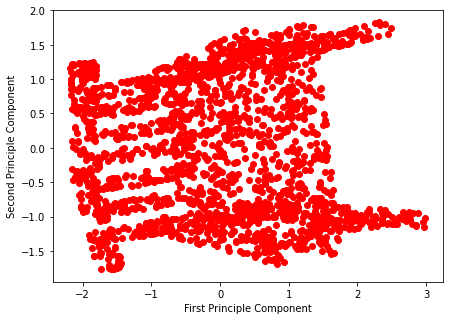

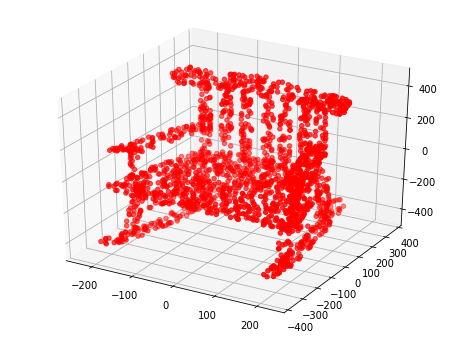

In [ ]:
plot3D_2D(2550)

#Evaluation (PointNet)

In [ ]:
NUM_CLASSES = 10
BATCH_SIZE = 32

In [ ]:
def augment(points, label):
    # jitter points
    #points == objet (Nx3) associer a une classe 50xNx3
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_dataset = tf.data.Dataset.from_tensor_slices((Strain, train_labels1))
test_dataset = tf.data.Dataset.from_tensor_slices((Stest, test_labels))


train_dataset = train_dataset.shuffle(len(Strain)).map(augment).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(len(Stest)).batch(BATCH_SIZE)

In [ ]:
def conv_bn(x, filters):
    # x: c'est l'input de taille Nx3 
    # filter de taille 1xfilters  --> output Nxfilters
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    #Batch Normalization applique une transformation qui maintient la sortie moyenne proche de 0 et l'écart type de sortie proche de 1
    #batch normalization affects the output of the previous activation layer by subtracting the batch mean, and then dividing by the batch’s standard deviation.
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x) #x > 0


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

In [ ]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))

In [ ]:
def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten()) #Id3
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    #matrice 3 x 3
    feat_T = layers.Reshape((num_features, num_features))(x)
    #matrice d'input 2048x2 multiplier par une matrice 2x2 --> output matrice de taille nx2
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [ ]:
inputs = keras.Input(shape=(NUM_POINTS, 2))

x = tnet(inputs, 2)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 2)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2048, 32)     96          ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 2048, 32)    128         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 2048, 32)     0           ['batch_normalization[0][0

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

history = model.fit(train_dataset, epochs=40, validation_data=test_dataset)

Epoch 1/40
130/130 [==============================] - 477s 4s/step - loss: 2.9738 - sparse_categorical_accuracy: 0.4284 - val_loss: 3.8185 - val_sparse_categorical_accuracy: 0.4185
Epoch 2/40
130/130 [==============================] - 472s 4s/step - loss: 2.5632 - sparse_categorical_accuracy: 0.5366 - val_loss: 2.8247 - val_sparse_categorical_accuracy: 0.5573
Epoch 3/40
130/130 [==============================] - 471s 4s/step - loss: 2.4522 - sparse_categorical_accuracy: 0.5607 - val_loss: 2.5925 - val_sparse_categorical_accuracy: 0.5033
Epoch 4/40
130/130 [==============================] - 479s 4s/step - loss: 2.3692 - sparse_categorical_accuracy: 0.5925 - val_loss: 2.7847 - val_sparse_categorical_accuracy: 0.3899
Epoch 5/40
130/130 [==============================] - 468s 4s/step - loss: 2.3071 - sparse_categorical_accuracy: 0.6125 - val_loss: 2.4474 - val_sparse_categorical_accuracy: 0.5341
Epoch 6/40
130/130 [==============================] - 460s 4s/step - loss: 2.3242 - sparse_cate

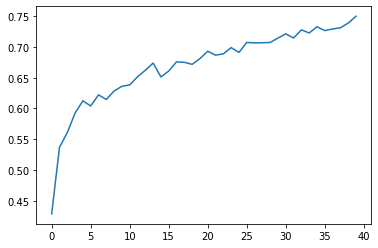

In [ ]:
# plot metrics
from matplotlib import pyplot
pyplot.plot(history.history["sparse_categorical_accuracy"])
pyplot.show()

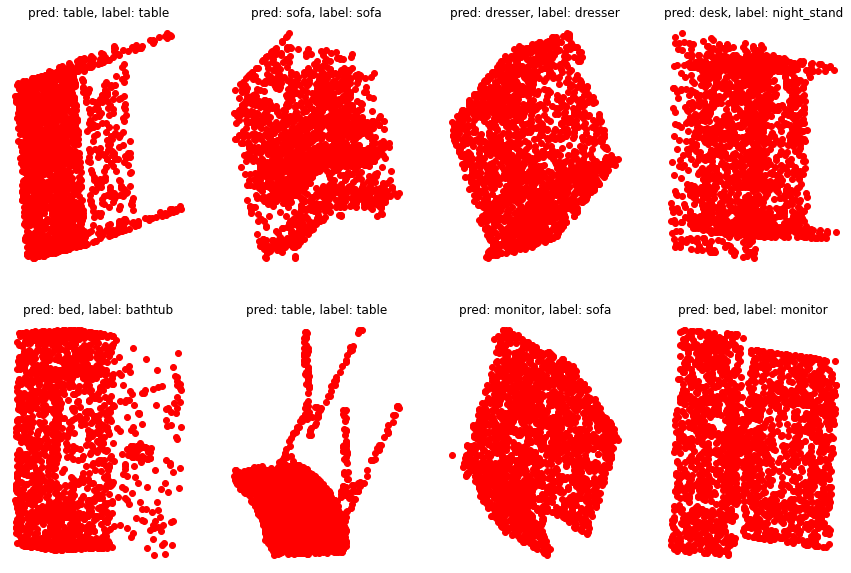

In [ ]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points1 = points[:8, ...]
labels1 = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)

preds1 = model.predict(points1)
preds1 = tf.math.argmax(preds1, -1)

points1 = points1.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1)
    ax.scatter(points1[i, :, 0], points1[i, :, 1], color="red")
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds1[i].numpy()], CLASS_MAP[labels1.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, preds))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3
           4       1.00      0.50      0.67         4
           5       0.75      0.75      0.75         4
           6       1.00      0.75      0.86         4
           7       0.00      0.00      0.00         1
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2

    accuracy                           0.84        32
   macro avg       0.79      0.80      0.77        32
weighted avg       0.85      0.84      0.83        32



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



CONFUSION MATRIX 


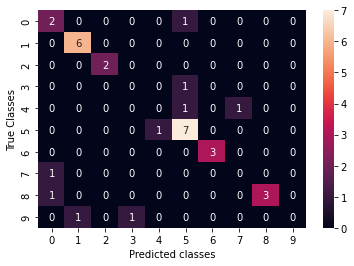

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

print("CONFUSION MATRIX ")
sns.heatmap(confusion_matrix(labels, preds),annot=True)
plt.ylabel('True Classes')
plt.xlabel('Predicted classes')
plt.show()